# GRIP - The Spark Foundation

# Khemchandra Mohankar

# TASK-1: Prediction Using Supervised ML

# Linear Regression with Python Scikit Learn


In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

# Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

Reading the dataset

In [2]:
df =  pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print("Data imported successfully")

Data imported successfully


Top 5 Rows using Head function.

In [28]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [29]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<AxesSubplot:ylabel='Frequency'>

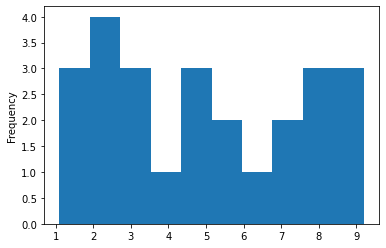

In [27]:
df['Hours'].plot.hist()

<AxesSubplot:>

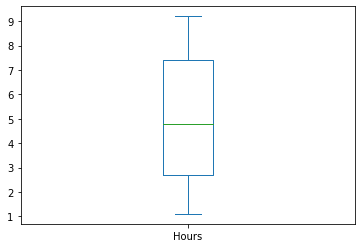

In [9]:
df['Hours'].plot.box()

Clearly there are no outliers in our data

In [10]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

There is no null value in the Dataset so, we can now visualize our Data.

# Data Visualization

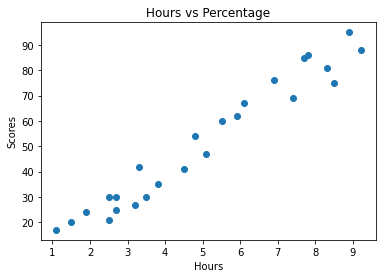

In [11]:
plt.scatter(df['Hours'], df['Scores'])
plt.title('Hours vs Percentage')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [12]:
print(df.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


It is confirmed that the variables are positively correlated.

# Training the Model

In [30]:
a = df.iloc[:, :-1].values
b = df.iloc[:, 1].values

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [32]:
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(a,b,test_size=0.2,random_state=0)

In [33]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(a_train, b_train)

LinearRegression()

1) Splitting the Data

In [34]:
# Defining X and y from the df
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

2) Fitting the Data into the model

In [35]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("---------Model Trained---------")

---------Model Trained---------


# Predicting the Percentage of Marks

In [36]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


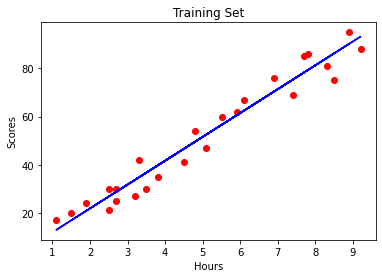

In [20]:
line = regressor.coef_*a+regressor.intercept_

plt.title("Training Set");
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.scatter(a, b,color="red")
plt.plot(a, line,color="blue");
plt.show()

In [21]:
print(a_test)
b_pred = regressor.predict(a_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# Comparing the Predicted Marks with the Actual Marks

In [22]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [23]:
print('Training Score :', regressor.score(a_train, b_train))
print("Testing Score :", regressor.score(a_test, b_test))

Training Score : 0.9515510725211552
Testing Score : 0.9454906892105354


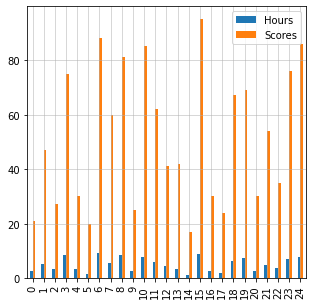

In [24]:
df.plot(kind="bar", figsize=(5,5))
plt.grid(which = 'major', linewidth='0.5')
plt.grid(which = 'minor', linewidth='0.5')

# What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [25]:
Hours = 9.25
test=np.array([Hours])
test=test.reshape(-1,1)
own_pred = regressor.predict(test)
print("No of Hours =",Hours)
print("Predicted Score =",own_pred[0])

No of Hours = 9.25
Predicted Score = 93.69173248737539


According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.69 marks.

# Final Step

In [26]:
from sklearn import metrics
print('Mean Absolute Error :',metrics.mean_absolute_error(b_test, b_pred))
print('Mean Squared Error :',metrics.mean_squared_error(b_test, b_pred))
print('Root Mean Squared Error :',np.sqrt(metrics.mean_squared_error(b_test, b_pred)))
print('R-2 :',metrics.r2_score(b_test, b_pred))

Mean Absolute Error : 4.183859899002982
Mean Squared Error : 21.598769307217456
Root Mean Squared Error : 4.647447612100373
R-2 : 0.9454906892105354
